In [1]:
from processing.database import Database
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
db = Database('../data/database.db')
cmt = db.query('SELECT * FROM comments')

In [3]:
print(cmt.info(verbose = True))
print(cmt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 21 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   num_sentences     int64 
 1   edited            int64 
 2   removal_type      int64 
 3   collapsed         int64 
 4   distinguished     int64 
 5   subreddit_type    int64 
 6   author            object
 7   body              object
 8   created_utc       int64 
 9   archived          int64 
 10  controversiality  int64 
 11  id                object
 12  link_id           object
 13  locked            int64 
 14  is_submitter      int64 
 15  parent_id         object
 16  score             int64 
 17  subreddit_id      object
 18  subreddit         object
 19  stickied          int64 
 20  permalink         object
dtypes: int64(13), object(8)
memory usage: 801.1+ MB
None
   num_sentences  edited  removal_type  collapsed  distinguished  \
0              5       0             0          0              1   
1  

In [4]:
out = cmt.describe().transpose()
out[out['std'] == 0].transpose() # std == 0 means that these are likely useless

""
count
mean
std
min
25%
50%
75%
max


count    5.000000e+06
mean     3.432675e+00
std      3.449026e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      5.160000e+02
Name: num_sentences, dtype: float64


<Axes: >

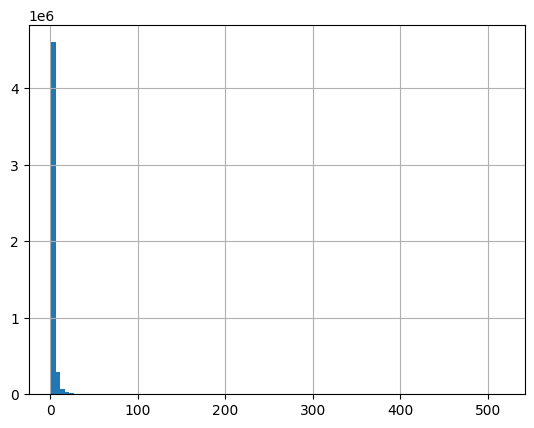

In [5]:
print(cmt['num_sentences'].describe())
cmt['num_sentences'].hist(bins = 100)

In [6]:
(cmt[cmt['num_sentences'] >= 3]['num_sentences']).count() / cmt['num_sentences'].count()

np.float64(0.4609094)

In [7]:
v = cmt[cmt['score'] == cmt['score'].min()]
print(v)
print(v['permalink'].values[0])

         num_sentences  edited  removal_type  collapsed  distinguished  \
1941702              3       0             0          0              0   

         subreddit_type            author  \
1941702               0  maxwellalbritten   

                                                      body  created_utc  \
1941702  Oh, guess we don''t just try stuff to see what...   1751343527   

         archived  controversiality       id     link_id  locked  \
1941702         0                 0  n0pcusp  t3_1los3sk       0   

         is_submitter   parent_id  score subreddit_id     subreddit  stickied  \
1941702             1  t1_n0pbjpu  -2298    t5_12967t  BaldursGate3         0   

                                                 permalink  
1941702  /r/BaldursGate3/comments/1los3sk/so_you_assass...  
/r/BaldursGate3/comments/1los3sk/so_you_assassinated_the_shadow_druids_too_early/n0pcusp/


In [9]:
cmt[cmt['controversiality'] == cmt['controversiality'].max()]['permalink'].values[0]

'/r/MurderedByWords/comments/1lomi26/choosing_beggar_takedown/n0o72ov/'

In [12]:
v = cmt[cmt['num_sentences'] == cmt['num_sentences'].max()]
v['permalink'].values[0]

'/r/GachaLife2/comments/1loo4d7/mikhail_reacts_to_your_ocsand_your_ocs_can_react/n0os1sj/'